### Anaphora resolution

1) Get the pretrained model of FastText from https://fasttext.cc/docs/en/english-vectors.html

2) At the pytorch develop a model, that is a feed forward neural network that consists of three layers, an input layer of size 600, a first layer of size 300, a second layer of 80 and an output layer with two units, all layers have regularization and dropout. The activation function on all layers is ReLU

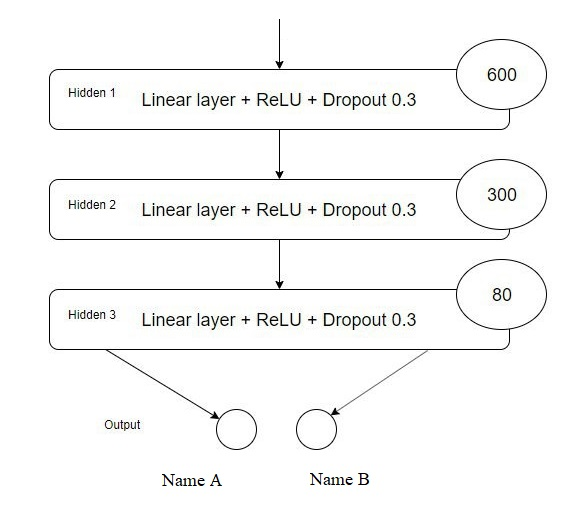

In [1]:
import pandas as pd

In [2]:
df_dev = pd.read_csv('gap-development.tsv',sep='\t')

The task is to identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. In the dataset, there are labels of the pronoun and two candidate names to which the pronoun could refer. An algorithm should be capable of deciding whether the pronoun refers to name A, name B, or neither.  
There are the following columns for analysis:
* ID - Unique identifier for an example (Matches to Id in output file format);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Pronoun - The target pronoun (text);
* Pronoun-offset The character offset of Pronoun in Text;
* A - The first name candidate (text);
* A-offset - The character offset of name A in Text;
* B - The second name candidate;
* B-offset - The character offset of name B in Text;
* URL - The URL of the source Wikipedia page for the example;


In [3]:
df_dev

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,True,DJ,347,False,http://en.wikipedia.org/wiki/Sandra_Collins
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,False,Akiva Eiger,253,False,http://en.wikipedia.org/wiki/Asher_Arieli
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,False,Robert Christgau,377,True,http://en.wikipedia.org/wiki/The_Truth_About_L...
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,False,Kelsey,267,True,http://en.wikipedia.org/wiki/Mary_S._Peake
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,True,Kirstine Stewart,226,False,http://en.wikipedia.org/wiki/Murdoch_Mysteries


In [4]:
df_dev.iloc[0]['Text']

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [5]:
df_val = pd.read_csv('gap-validation.tsv',sep='\t')

In [6]:
df_val

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...
1,validation-2,"Kathleen Nott was born in Camberwell, London. ...",She,185,Ellen,110,False,Kathleen,150,True,http://en.wikipedia.org/wiki/Kathleen_Nott
2,validation-3,"When she returns to her hotel room, a Liberian...",his,435,Jason Scott Lee,383,False,Danny,406,True,http://en.wikipedia.org/wiki/Hawaii_Five-0_(20...
3,validation-4,"On 19 March 2007, during a campaign appearance...",he,333,Reucassel,300,True,Debnam,325,False,http://en.wikipedia.org/wiki/Craig_Reucassel
4,validation-5,"By this time, Karen Blixen had separated from ...",she,427,Finch Hatton,290,False,Beryl Markham,328,True,http://en.wikipedia.org/wiki/Denys_Finch_Hatton
5,validation-6,No amount of logic can shatter a faith conscio...,he,296,James Randi,189,False,Jos* Alvarez,272,True,http://en.wikipedia.org/wiki/True-believer_syn...
6,validation-7,Lieutenant General Weber Pasha wanted Faik Pas...,He,294,von Sanders,231,False,Faik Pasha,253,True,http://en.wikipedia.org/wiki/Faik_Pasha
7,validation-8,He went on to enter mainstream journalism as a...,his,378,Colin,267,False,Jake Burns,340,True,http://en.wikipedia.org/wiki/Colin_McClelland
8,validation-9,"In 1940 Lester Cowan, an independent film prod...",he,399,Scott,370,False,Cowan,388,True,http://en.wikipedia.org/wiki/Shirley_Temple
9,validation-10,"They have a stormy marriage, caused by his hot...",her,298,Beverley Callard,325,True,Liz,370,False,http://en.wikipedia.org/wiki/Liz_McDonald


In [7]:
import numpy as np
import gensim

In [8]:
fasttext = gensim.models.fasttext.FastText.load_fasttext_format('wiki.en.bin')
A_tensor = []
B_tensor = []
p_tensor = []
for i in range(len(df_dev['A'])):
    A_tensor.append(fasttext.wv[df_dev['A'][i]])
    B_tensor.append(fasttext.wv[df_dev['B'][i]])
    p_tensor.append(fasttext.wv[df_dev['Pronoun'][i]])
dataset_with_tensors = pd.DataFrame()
dataset_with_tensors['A'] = A_tensor
dataset_with_tensors['B'] = B_tensor
dataset_with_tensors['Pronoun'] = p_tensor
dataset_with_tensors['A-coref'] = df_dev['A-coref'].replace(True,1)
dataset_with_tensors['B-coref'] = df_dev['B-coref'].replace(True,1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [9]:
from torch import nn

In [10]:
import torch
inp = []
for i in range(len(A_tensor)):
    input1 = np.append(A_tensor[i],B_tensor[i])
    input2 = np.append(input1, p_tensor[i])
    inp.append(input2)
X = torch.tensor(inp).float()
print('input size: ', len(X[0]))
print('len of train dataset: ',len(X))
print('The first free raws: ')
print(X[:3])

input size:  900
len of train dataset:  2000
The first free raws: 
tensor([[ 0.2072,  0.0463,  0.1232,  ...,  0.4101,  0.0578,  0.2908],
        [ 0.0793,  0.0274, -0.0651,  ...,  0.0558,  0.4029, -0.8033],
        [-0.4349, -0.2292,  0.0815,  ...,  0.4401, -0.0977,  0.2298]])


In [11]:
dataset_with_tensors.head()

,A,B,Pronoun,A-coref,B-coref
0,"[0.20722698, 0.046324596, 0.123187125, 0.02980...","[0.050630115, 0.079322815, -0.20837106, 0.4176...","[0.23167726, 0.048626047, -0.2783578, 0.310555...",1.0,0.0
1,"[0.07929457, 0.027403368, -0.06506348, -0.0076...","[-0.18771006, -0.15013029, 0.004081186, 0.0881...","[0.013744404, -0.3271882, 0.52612346, 0.560924...",1.0,0.0
2,"[-0.43492344, -0.22918437, 0.08146006, 0.02927...","[-0.10447918, -0.23179889, 0.057727065, -0.066...","[0.104024425, -0.28820887, -0.1581829, 0.20985...",0.0,1.0
3,"[0.08626314, 0.0841154, -0.06387855, 0.2759951...","[0.10059552, 0.1925702, -0.02262189, 0.143873,...","[0.104024425, -0.28820887, -0.1581829, 0.20985...",0.0,1.0
4,"[0.13949117, -0.0039573913, 0.012229018, -0.02...","[0.14959028, 0.36849105, 0.15276578, -0.261143...","[-0.029501453, 0.23555057, -0.20406115, 0.2393...",0.0,1.0


In [12]:
out = []
y1 = dataset_with_tensors['A-coref'].values
y2 = dataset_with_tensors['B-coref'].values
for i in range(len(X)):
    output1 = np.append(y1[i],y2[i])
    out.append(output1)
y = torch.tensor(out).float()
print('output size: ', len(y[0]))
print('len of train dataset: ',len(y))
print('The first free raws: ')
print(y[:3])
#True = 1 
#False = 0

output size:  2
len of train dataset:  2000
The first free raws: 
tensor([[1., 0.],
        [1., 0.],
        [0., 1.]])


In [111]:
input_size = len(X[0])
hidden_sizes = [600,300, 80]
output_size = 2
model = nn.Sequential(
                      nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[2], output_size))
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss = 1
loss_arr = []
for i in range(5000):
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss_arr.append(loss)
            if (i%100 == 0):
                print(i, loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
print(i, loss.item())

Sequential(
  (0): Linear(in_features=900, out_features=600, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3)
  (3): Linear(in_features=600, out_features=300, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3)
  (6): Linear(in_features=300, out_features=80, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3)
  (9): Linear(in_features=80, out_features=2, bias=True)
)
0 0.3897177278995514
100 0.20757021009922028
200 0.05568455159664154
300 0.02851875312626362
400 0.020448610186576843
500 0.015827413648366928
600 0.013499511405825615
700 0.011933093890547752
800 0.01195305585861206
900 0.010408499278128147
1000 0.009897424839437008
1100 0.009687239304184914
1200 0.009043649770319462
1300 0.009096520952880383
1400 0.008304986171424389
1500 0.00814563687890768
1600 0.007815321907401085
1700 0.007195419166237116
1800 0.007007600273936987
1900 0.0071646771393716335
2000 0.006483977194875479
2100 0.006732281297445297
2200 0.006087346468120813
2300 0.00611385190859437
2400 0.005810289643704891
2500 0.0059

In [130]:
print(y_pred)

tensor([[ 0.9572,  0.0089],
        [ 0.9170,  0.0258],
        [ 0.0074,  0.9758],
        ...,
        [ 1.0093, -0.0098],
        [ 1.0783, -0.0189],
        [-0.0118,  1.0156]], grad_fn=<AddmmBackward>)


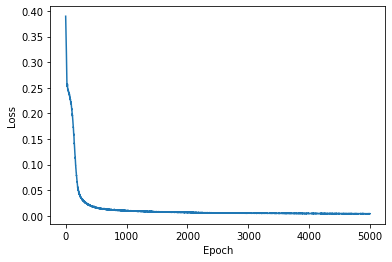

In [131]:
import matplotlib.pyplot as plt
epoch = []
for i in range (len(loss_arr)):
    epoch.append(i)
plt.plot(epoch, loss_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [132]:
print(y_pred)

tensor([[ 0.9572,  0.0089],
        [ 0.9170,  0.0258],
        [ 0.0074,  0.9758],
        ...,
        [ 1.0093, -0.0098],
        [ 1.0783, -0.0189],
        [-0.0118,  1.0156]], grad_fn=<AddmmBackward>)


In [133]:
print(y)

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]])


In [134]:
#For test data

In [135]:
A_tensor_test = []
B_tensor_test = []
p_tensor_test = []
for i in range(len(df_val['A'])):
    A_tensor_test.append(fasttext.wv[df_val['A'][i]])
    B_tensor_test.append(fasttext.wv[df_val['B'][i]])
    p_tensor_test.append(fasttext.wv[df_val['Pronoun'][i]])

In [148]:
import torch
inp = []
for i in range(len(A_tensor_test)):
    input1 = np.append(A_tensor_test[i],B_tensor_test[i])
    input2 = np.append(input1, p_tensor_test[i])
    inp.append(input2)
X_test = torch.tensor(inp).float()
print('FOR TASTING DATA')
print('input size: ', len(X_test[0]))
print('len of train dataset: ',len(X_test))
print('The first free raws: ')
print(X_test[:3])

FOR TASTING DATA
input size:  900
len of train dataset:  454
The first free raws: 
tensor([[-0.1394,  0.0182,  0.0389,  ...,  0.3287,  0.1988,  0.2779],
        [ 0.1304, -0.0368, -0.0333,  ..., -0.2414, -0.0914, -0.1415],
        [-0.1029, -0.0926, -0.0633,  ...,  0.4401, -0.0977,  0.2298]])


In [149]:
y1 = (df_val['A-coref'].replace(True, 1).values)
y2 = (df_val['B-coref'].replace(True, 1).values)

In [150]:
out = []
for i in range(len(X_test)):
    output1 = np.append(y1[i],y2[i])
    out.append(output1)
y_test = torch.tensor(out).float()
print('output size: ', len(y_test[0]))
print('len of train dataset: ',len(y_test))
print('The first free raws: ')
print(y_test[:3])

output size:  2
len of train dataset:  454
The first free raws: 
tensor([[0., 0.],
        [0., 1.],
        [0., 1.]])


In [151]:
y_test_pred = model(X_test)

In [152]:
y_test_pred_np = (np.round((y_test_pred).detach().numpy() ))**2

In [154]:
y_test_class = []
for i in range (len(y_test)):
    y_test2 = y_test[i].detach().numpy()
    if (y_test2[0] == 0):
        if (y_test2[1] == 0):
            y_test_class.append('class1')
    if (y_test2[0] == 0):
        if (y_test2[1] >= 1):
            y_test_class.append('class2')
    if (y_test2[0]== 1):
        if (y_test2[1]== 0):
            y_test_class.append('class3')
    if (y_test2[0]>= 1):
        if (y_test2[1] >= 1):
            y_test_class.append('class4')

In [155]:
y_test_pred_class = []
for i in range (len(y_test_pred_np)):
    y_test2 = y_test_pred_np[i]
    if (y_test2[0] == 0):
        if (y_test2[1] == 0):
            y_test_pred_class.append('class1')
    if (y_test2[0] ==0):
        if (y_test2[1] == 1):
            y_test_pred_class.append('class2')
    if (y_test2[0] == 1):
        if (y_test2[1] == 0):
            y_test_pred_class.append('class3')
    if (y_test2[0] == 1):
        if (y_test2[1] == 1):
            y_test_pred_class.append('class4')

In [161]:
from sklearn.metrics import classification_report
clr = classification_report(y_test_class, y_test_pred_class)
print('Classification report for both classes')
print('Firsly I identify classes as both false - class1, falsefrue - class2, truefalse - class3, truetrue -class4')
print(clr)

Classification report for both classes
Firsly I identify classes as both false - class1, falsefrue - class2, truefalse - class3, truetrue -class4
              precision    recall  f1-score   support

      class1       0.22      0.14      0.17        65
      class2       0.50      0.54      0.52       205
      class3       0.46      0.46      0.46       184
      class4       0.00      0.00      0.00         0

    accuracy                           0.45       454
   macro avg       0.29      0.29      0.29       454
weighted avg       0.44      0.45      0.45       454



In [162]:
from sklearn.metrics import classification_report
y_test_np = np.array(y_test)
clr1 = classification_report(y_test_np.T[0], y_test_pred_np.T[0])
print('Classification report for the A output')
print(clr1)

Classification report for the A output
              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63       270
         1.0       0.46      0.48      0.47       184

    accuracy                           0.56       454
   macro avg       0.55      0.55      0.55       454
weighted avg       0.57      0.56      0.56       454



In [163]:
from sklearn.metrics import classification_report
clr2 = classification_report(y_test_np.T[1], y_test_pred_np.T[1])
print('Classification report for the B output')
print(clr2)

Classification report for the B output
              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56       249
         1.0       0.50      0.55      0.52       205

    accuracy                           0.54       454
   macro avg       0.54      0.54      0.54       454
weighted avg       0.55      0.54      0.55       454



In [164]:
model_was_right = 0
for i in range(len(y_test_np)):
    if (y_test_np[i][0] == y_test_pred_np[i][0]):
        if (y_test_np[i][1] == y_test_pred_np[i][1]):
            model_was_right = model_was_right + 1
accuracy = 100*model_was_right/(len(y_test_np))
print('Model was right in ', model_was_right, 'from ', len(y_test_np),' observations. So accuracy is ', round(accuracy, 2), '%')

        

Model was right in  205 from  454  observations. So accuracy is  45.15 %
